In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
sns.set(style="whitegrid", palette="pastel")

In [3]:
countries = {
    'Benin': pd.read_csv('data/benin_clean.csv'),
    'Togo': pd.read_csv('data/togo_clean.csv'),
    'Sierra Leone': pd.read_csv('data/sierraleone_clean.csv')
}

In [4]:
# Add country identifier to each DataFrame
for country, df in countries.items():
    df['Country'] = country
# Combine into one DataFrame for easier plotting
combined = pd.concat(countries.values())

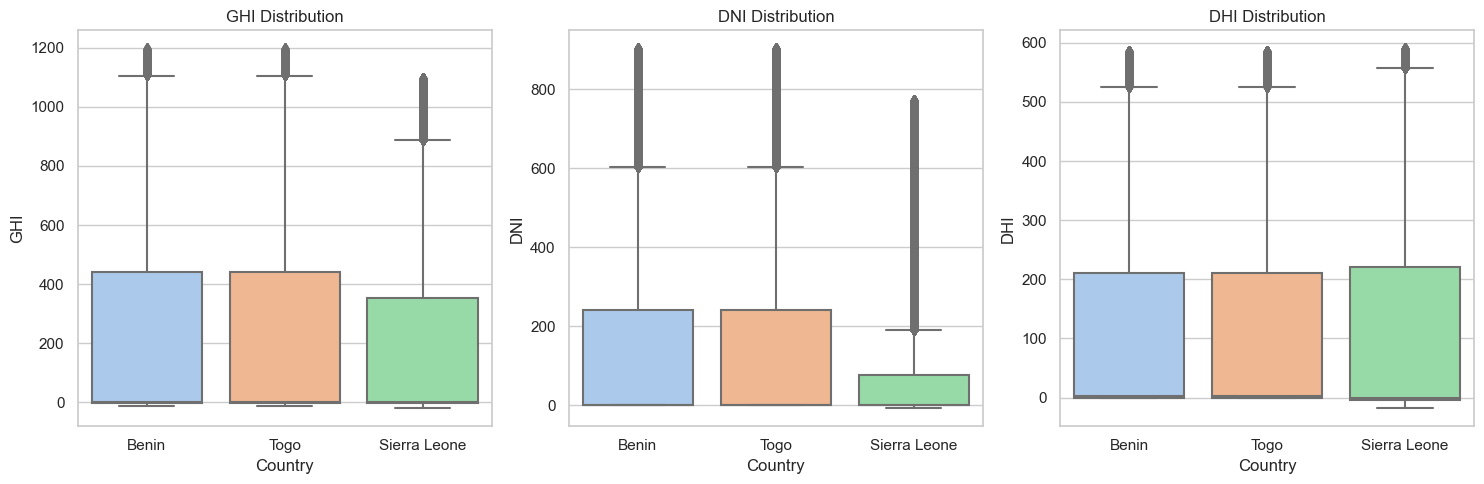

In [10]:
plt.figure(figsize=(15, 5))
for i, metric in enumerate(['GHI', 'DNI', 'DHI'], 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='Country', y=metric, data=combined, 
                order=['Benin', 'Togo', 'Sierra Leone'])  
    plt.title(f'{metric} Distribution')
plt.tight_layout()
plt.show()

In [11]:
anova_result = stats.f_oneway(
    countries['Benin']['GHI'].dropna(),
    countries['Togo']['GHI'].dropna(),
    countries['Sierra Leone']['GHI'].dropna()
)

print(f"ANOVA Results for GHI:\nF-statistic: {anova_result.statistic:.2f}, p-value: {anova_result.pvalue:.4f}")

# Effect size (Eta-squared)
ss_between = sum([group.count() * (group.mean() - combined['GHI'].mean())**2 
                 for group in country_groups])
ss_total = sum((combined['GHI'] - combined['GHI'].mean())**2)
eta_squared = ss_between / ss_total

print(f"Effect Size (η²): {eta_squared:.3f}")  # Added effect size

ANOVA Results for GHI:
F-statistic: 2008.67, p-value: 0.0000
Effect Size (η²): 0.003


In [13]:
stats_table = combined.groupby('Country').agg({
    'GHI': ['mean', 'median', 'std'],
    'DNI': ['mean', 'median', 'std'],
    'DHI': ['mean', 'median', 'std']
}).round(1)

# Format for readability
stats_table.style \
    .background_gradient(cmap='Blues', subset=[('GHI', 'mean'), ('DNI', 'mean'), ('DHI', 'mean')]) \
    .format(precision=1)

In [8]:
## 4. Statistical Testing (ANOVA)

# %%
# Prepare data for ANOVA
country_groups = [df['GHI'].dropna() for df in countries.values()]

# One-way ANOVA
f_stat, p_value = stats.f_oneway(*country_groups)
print(f"\nANOVA Results for GHI:")
print(f"F-statistic: {f_stat:.2f}, p-value: {p_value:.4f}")

if p_value < 0.05:
    print("Significant differences exist between countries (p < 0.05)")
    # Post-hoc test if significant
    from statsmodels.stats.multicomp import pairwise_tukeyhsd
    tukey = pairwise_tukeyhsd(combined['GHI'].dropna(), 
                             combined['Country'].dropna(),
                             alpha=0.05)
    print("\nPost-hoc Tukey HSD:")
    print(tukey)
else:
    print("No significant differences between countries (p ≥ 0.05)")


ANOVA Results for GHI:
F-statistic: 2008.67, p-value: 0.0000
Significant differences exist between countries (p < 0.05)

Post-hoc Tukey HSD:
       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1       group2    meandiff p-adj  lower    upper   reject
-----------------------------------------------------------------
       Benin Sierra Leone -33.3899   0.0 -34.8156 -31.9643   True
       Benin         Togo      0.0   1.0  -1.4257   1.4257  False
Sierra Leone         Togo  33.3899   0.0  31.9643  34.8156   True
-----------------------------------------------------------------


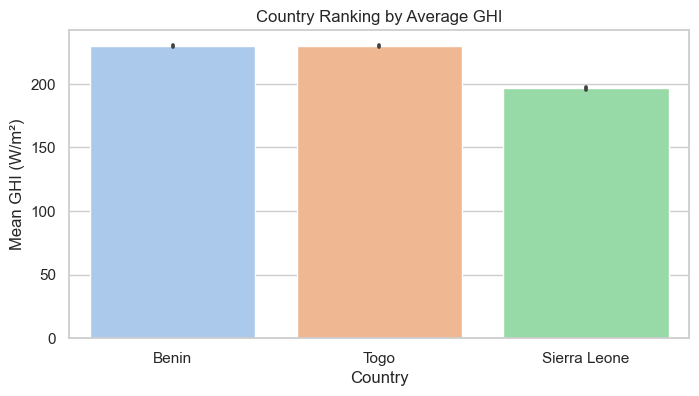

In [9]:
# Ranking by average GHI
plt.figure(figsize=(8, 4))
sns.barplot(x='Country', y='GHI', data=combined, 
            estimator=np.mean, order=combined.groupby('Country')['GHI'].mean().sort_values(ascending=False).index)
plt.title('Country Ranking by Average GHI')
plt.ylabel('Mean GHI (W/m²)')
plt.show()

C:\Users\Hiwi\AppData\Local\Temp\ipykernel_15804\2373630556.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x='Country', y='GHI', data=combined,


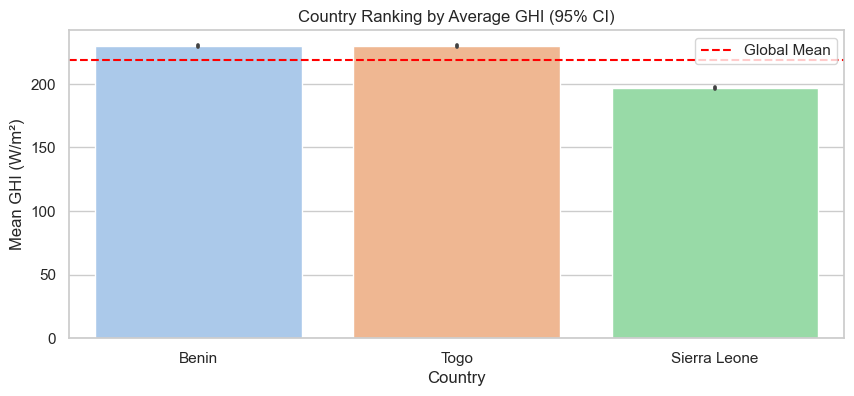

In [15]:
# Ranked bar chart with confidence intervals
plt.figure(figsize=(10, 4))
sns.barplot(x='Country', y='GHI', data=combined, 
            estimator=np.mean, ci=95,
            order=stats_table[('GHI', 'mean')].sort_values(ascending=False).index)
plt.title('Country Ranking by Average GHI (95% CI)')
plt.ylabel('Mean GHI (W/m²)')
plt.axhline(combined['GHI'].mean(), ls='--', color='red', label='Global Mean')
plt.legend()
plt.show()

In [16]:
print(combined.groupby('Country')['RH'].mean())  # Relative humidity

Country
Benin           55.013160
Sierra Leone    79.448857
Togo            55.013160
Name: RH, dtype: float64
